### This notebook is for getting the results for the whole dataset from comparison algorithms. It takes about a minute- a minute and a half to run if scikit-network is already installed.

In [1]:
!pip install scikit-network

In [2]:
import pandas as pd  
from sknetwork.data import from_edge_list
  
df = pd.read_csv('clean_letterboxd.csv') 
 
df_new = df.drop('rating', axis=1)

In [3]:
from IPython.display import SVG
import numpy as np
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from scipy import sparse

from sknetwork.visualization import visualize_bigraph

import time

start_time = time.time()

edge_list = list(df_new.itertuples(index=False))
graph = from_edge_list(edge_list, bipartite=True)

biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

# clustering using bilouvain
louvain = Louvain()
louvain.fit(biadjacency)
labels_row = louvain.labels_row_
labels_col = louvain.labels_col_

end_time = time.time()
ex_time = end_time - start_time
print(f"execution time for bilouvain: {ex_time}")

execution time for bilouvain: 11.88474416732788


In [4]:
modularity_bilouvain = get_modularity(biadjacency, labels_row, labels_col)
print(f"modularity for bilouvain: {modularity_bilouvain}") # barber's modularity by default

modularity for bilouvain: 0.23842765617764183


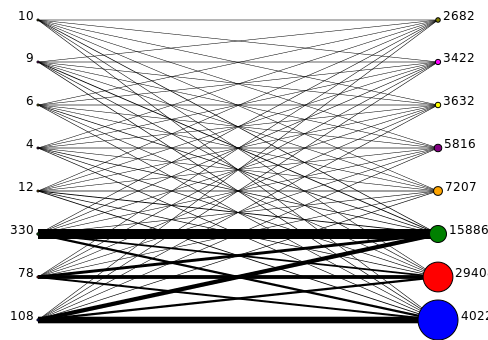

In [5]:
# aggregate graph
biadjacency_aggregate = louvain.aggregate_
labels_unique_row, counts_row = np.unique(labels_row, return_counts=True)
labels_unique_col, counts_col = np.unique(labels_col, return_counts=True)

image = visualize_bigraph(biadjacency_aggregate, counts_row, counts_col, labels_unique_row, labels_unique_col,
                    display_node_weight=True, node_weights_row=counts_row, node_weights_col=counts_col)
SVG(image)

In [6]:
print(len(labels_row)) # total number of users

557


In [7]:
len(labels_col) # total number of movies

108275

In [8]:
len(set(labels_col)) # number of communities

8

In [9]:
from sknetwork.clustering import Leiden

start_time = time.time()

edge_list = list(df_new.itertuples(index=False))
graph = from_edge_list(edge_list, bipartite=True)

biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

# clustering using Leiden
leiden = Leiden()
leiden.fit(biadjacency)
labels_row = leiden.labels_row_
labels_col = leiden.labels_col_

end_time = time.time()
ex_time = end_time - start_time
print(f"execution time for Leiden: {ex_time}")

execution time for Leiden: 13.46578073501587


In [17]:
modularity_leiden = get_modularity(biadjacency, labels_row, labels_col)
print(f"modularity for leiden: {modularity_leiden}") # barber's modularity by default

modularity for leiden: 0.23859847808338286


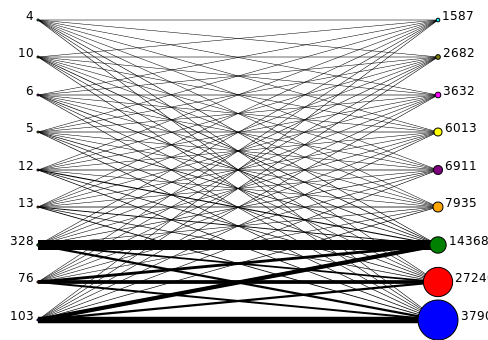

In [11]:
# aggregate graph
biadjacency_aggregate = leiden.aggregate_
labels_unique_row, counts_row = np.unique(labels_row, return_counts=True)
labels_unique_col, counts_col = np.unique(labels_col, return_counts=True)
image = visualize_bigraph(biadjacency_aggregate, counts_row, counts_col, labels_unique_row, labels_unique_col,
                    display_node_weight=True, node_weights_row=counts_row, node_weights_col=counts_col)
SVG(image)

In [12]:
len(set(labels_col)) # number of communities

9

In [13]:
len(labels_col) # total number of movies

108275

In [14]:
print(len(labels_row)) # total number of users

557


In [15]:

import networkx as nx
import community
import csv

# Load and parse the dataset
dataset_path = "clean_letterboxd.csv"  # this is the path to your dataset file
user_movie_ratings = []

with open(dataset_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_movie_ratings.append((int(row['user']), row['title']))

# Create the bipartite graph
mygraph = nx.Graph()
user_nodes = set()
movie_nodes = set()

# Add edges between users and movies
for user, movie in user_movie_ratings:
    mygraph.add_edge(user, movie)
    user_nodes.add(user)
    movie_nodes.add(movie)

# Perform community detection using unipartite Louvain method
start_time = time.time()
louvain_communities = community.best_partition(mygraph)

end_time = time.time()
ex_time = end_time - start_time
print("Execution time:", ex_time, "seconds")

# Reverse the dictionary to get communities as keys
louvain_communities_reversed = {}
for node, com in louvain_communities.items():
    if com not in louvain_communities_reversed:
        louvain_communities_reversed[com] = [node]
    else:
        louvain_communities_reversed[com].append(node)

for community, nodes in louvain_communities_reversed.items():
    print(f"community: {community}, size: {len(nodes)}")

Execution time: 46.262744665145874 seconds
community: 0, size: 15542
community: 1, size: 26439
community: 2, size: 39173
community: 3, size: 2706
community: 7, size: 6483
community: 5, size: 3484
community: 6, size: 9662
community: 8, size: 1861
community: 4, size: 3482


In [16]:
community_list = [[] for _ in range(max(louvain_communities.values()) + 1)]
for node, com in louvain_communities.items():
    community_list[com].append(node)

modularity = nx.community.modularity(mygraph, community_list)
print(f"modularity value: {modularity}")

modularity value: 0.23949558235154467
